<a href="https://colab.research.google.com/github/Puli-vigneswar/sentiment_analysis_healthcare_reviews/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEALTH CARE FEEDBACKS SENTIMENT ANALYSIS

## Importing all the required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,f1_score,mean_squared_error,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pickle

Reading the csv file

In [ ]:

df=pd.read_csv("D:/Final_project/healthcare_reviews.csv")


In [ ]:
df.drop(columns='Rating',axis=1,inplace=True)
df.columns

Index(['Review_Text'], dtype='object')

In [ ]:
df["Review_Text"]=df["Review_Text"].astype(str)

In [ ]:
df.dropna()

,Review_Text
0,I have mixed feelings about my experience.
1,The staff was caring and attentive. I couldn't...
2,I have mixed feelings about my experience.
3,I have mixed feelings about my experience.
4,The healthcare provider was excellent. I had a...
...,...
995,My experience was terrible. I would not recomm...
996,The service was disappointing. I won't be comi...
997,"The service was okay, but nothing exceptional."
998,I have mixed feelings about my experience.


In [ ]:
#df = df.drop_duplicates(subset=['Review_Text'], keep='first')

In [ ]:
df["Review_Text"]=df["Review_Text"].astype(str)
df["Review_Text"]=df["Review_Text"].str.lower()


In [ ]:
df["Review_Text"].replace("nan","")

0            i have mixed feelings about my experience. 
1      the staff was caring and attentive. i couldn't...
2            i have mixed feelings about my experience. 
3            i have mixed feelings about my experience. 
4      the healthcare provider was excellent. i had a...
                             ...                        
995    my experience was terrible. i would not recomm...
996    the service was disappointing. i won't be comi...
997      the service was okay, but nothing exceptional. 
998          i have mixed feelings about my experience. 
999    the staff was caring and attentive. i couldn't...
Name: Review_Text, Length: 1000, dtype: object

In [ ]:
df.columns

Index(['Review_Text'], dtype='object')

In [ ]:
df = df[df['Review_Text'] != 'nan']
len(df)

900

## final dataframe

In [ ]:
df["Review_Text"]

0            i have mixed feelings about my experience. 
1      the staff was caring and attentive. i couldn't...
2            i have mixed feelings about my experience. 
3            i have mixed feelings about my experience. 
4      the healthcare provider was excellent. i had a...
                             ...                        
995    my experience was terrible. i would not recomm...
996    the service was disappointing. i won't be comi...
997      the service was okay, but nothing exceptional. 
998          i have mixed feelings about my experience. 
999    the staff was caring and attentive. i couldn't...
Name: Review_Text, Length: 900, dtype: object

In [ ]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity'] = df['Review_Text'].apply(polarity)
polarity("i cant say anything about this")

0.0

In [ ]:
def label_sentiments(x):
    if x>0:
        return 1
    if x==0 :
        return 0
    else:
        return -1

df['sentiment'] = df['polarity'].apply(label_sentiments)
df

,Review_Text,polarity,sentiment
0,i have mixed feelings about my experience.,0.000000,0
1,the staff was caring and attentive. i couldn't...,0.400000,1
2,i have mixed feelings about my experience.,0.000000,0
3,i have mixed feelings about my experience.,0.000000,0
4,the healthcare provider was excellent. i had a...,0.900000,1
...,...,...,...
995,my experience was terrible. i would not recomm...,-1.000000,-1
996,the service was disappointing. i won't be comi...,-0.300000,-1
997,"the service was okay, but nothing exceptional.",0.583333,1
998,i have mixed feelings about my experience.,0.000000,0


importing stopwords for data cleaning

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words_to_remove = {'not','aren',"aren't",'are', 'other','ain', 'unwanted'}
stop_words = set(word for word in stop_words if word not in words_to_remove)
df['stopwords'] = df['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


In [ ]:
df["stopwords"][0]

'mixed feelings experience.'

In [ ]:
def remove_special_symbols(text):
    pattern = r"[^\w\s]"
    cleaned_text = re.sub(pattern, "", text)
    return cleaned_text

def lemmatised(text):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(text)

df["stopwords"]=df["stopwords"].apply(remove_special_symbols)
df["lemmatised"]=df["stopwords"].apply(lemmatised)
df["lemmatised"]

0                             mixed feelings experience
1                        staff caring attentive happier
2                             mixed feelings experience
3                             mixed feelings experience
4        healthcare provider excellent great experience
                             ...                       
995    experience terrible would not recommend provider
996                   service disappointing coming back
997                    service okay nothing exceptional
998                           mixed feelings experience
999                      staff caring attentive happier
Name: lemmatised, Length: 900, dtype: object

In [ ]:
x=df["lemmatised"].values
y=df["sentiment"].values

In [ ]:
x

array(['mixed feelings experience', 'staff caring attentive happier',
       'mixed feelings experience', 'mixed feelings experience',
       'healthcare provider excellent great experience',
       'staff caring attentive happier',
       'bad experience healthcare provider avoid possible',
       'mixed feelings experience', 'mixed feelings experience',
       'service okay nothing exceptional',
       'service okay nothing exceptional',
       'healthcare provider excellent great experience',
       'service okay nothing exceptional',
       'bad experience healthcare provider avoid possible',
       'staff caring attentive happier',
       'bad experience healthcare provider avoid possible',
       'experience terrible would not recommend provider',
       'bad experience healthcare provider avoid possible',
       'service disappointing coming back',
       'staff caring attentive happier',
       'im satisfied service received highly recommended',
       'service disappointing co

##splitting the train test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [ ]:
x_test

array(['service disappointing coming back',
       'average experience neither good bad', 'mixed feelings experience',
       'service disappointing coming back',
       'healthcare provider excellent great experience',
       'healthcare provider excellent great experience',
       'experience terrible would not recommend provider',
       'healthcare provider excellent great experience',
       'im satisfied service received highly recommended',
       'staff caring attentive happier',
       'healthcare provider excellent great experience',
       'healthcare provider excellent great experience',
       'service okay nothing exceptional',
       'experience terrible would not recommend provider',
       'staff caring attentive happier',
       'average experience neither good bad',
       'service okay nothing exceptional',
       'bad experience healthcare provider avoid possible',
       'staff caring attentive happier',
       'healthcare provider excellent great experience',
   

converting reviwes to features with tfidf vectorizer

In [ ]:
print(x_test)

['service disappointing coming back' 'average experience neither good bad'
 'mixed feelings experience' 'service disappointing coming back'
 'healthcare provider excellent great experience'
 'healthcare provider excellent great experience'
 'experience terrible would not recommend provider'
 'healthcare provider excellent great experience'
 'im satisfied service received highly recommended'
 'staff caring attentive happier'
 'healthcare provider excellent great experience'
 'healthcare provider excellent great experience'
 'service okay nothing exceptional'
 'experience terrible would not recommend provider'
 'staff caring attentive happier' 'average experience neither good bad'
 'service okay nothing exceptional'
 'bad experience healthcare provider avoid possible'
 'staff caring attentive happier'
 'healthcare provider excellent great experience'
 'bad experience healthcare provider avoid possible'
 'healthcare provider excellent great experience'
 'staff caring attentive happier' 's

## TRANSFORMING AND FITTING THE REVIEWS DATA

In [ ]:
vector=TfidfVectorizer()
x_train=vector.fit_transform(x_train)
x_test=vector.transform(x_test)

In [ ]:
print(x_test)

  (0, 29)	0.35349533017162793
  (0, 7)	0.5400743935011335
  (0, 6)	0.5400743935011335
  (0, 3)	0.5400743935011335
  (1, 19)	0.5087589385565627
  (1, 12)	0.5087589385565627
  (1, 10)	0.25702032173981787
  (1, 4)	0.396779008428066
  (1, 1)	0.5087589385565627
  (2, 18)	0.665895013279731
  (2, 11)	0.665895013279731
  (2, 10)	0.33640401688798793
  (3, 29)	0.35349533017162793
  (3, 7)	0.5400743935011335
  (3, 6)	0.5400743935011335
  (3, 3)	0.5400743935011335
  (4, 24)	0.3704929618443607
  (4, 15)	0.4300345949071015
  (4, 13)	0.5467404393747917
  (4, 10)	0.28276314524951407
  (4, 8)	0.5467404393747917
  (5, 24)	0.3704929618443607
  (5, 15)	0.4300345949071015
  (5, 13)	0.5467404393747917
  (5, 10)	0.28276314524951407
  :	:
  (175, 24)	0.29583289661596723
  (175, 20)	0.46408657266202047
  (175, 10)	0.22578199569293242
  (176, 19)	0.5087589385565627
  (176, 12)	0.5087589385565627
  (176, 10)	0.25702032173981787
  (176, 4)	0.396779008428066
  (176, 1)	0.5087589385565627
  (177, 24)	0.370492961844

In [ ]:
model=LogisticRegression(max_iter=100)
model.fit(x_train,y_train)
xpred=model.predict(x_train)
acscorelog=r2_score(y_train,xpred)
acscorelog


1.0

In [ ]:
xtestpred=model.predict(x_test)
testacs=r2_score(y_test,xtestpred)
testacs

1.0

In [ ]:
x_test

<180x33 sparse matrix of type '<class 'numpy.float64'>'
	with 859 stored elements in Compressed Sparse Row format>

In [ ]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)

ypr=svr.predict(x_test)
acscoresvr=r2_score(y_test,ypr)
acscoresvr

0.9899673038914134

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
ypredkn=knn.predict(x_test)
knac=r2_score(y_test,ypredkn)
knac

1.0

In [ ]:
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(x_train,y_train)
yprdtr=dtr.predict(x_test)
acsdtr=r2_score(y_test,yprdtr)
acsdtr


0.8896391096335258

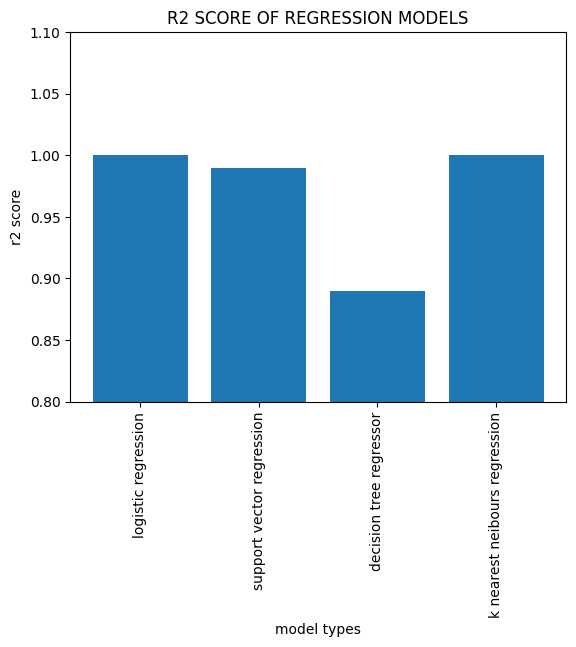

In [ ]:
a = ['logistic regression', 'support vector regression', 'decision tree regressor',"k nearest neibours regression"]
b = [acscorelog,acscoresvr,acsdtr,knac]
plt.bar(a, b)
plt.ylim(0.8,max(b)+0.1)
plt.title("R2 SCORE OF REGRESSION MODELS")
plt.xlabel("model types")
plt.xticks( rotation=90)
plt.ylabel("r2 score")
plt.show()


In [ ]:
print(x_test)

  (0, 3)	0.5400743935011335
  (0, 6)	0.5400743935011335
  (0, 7)	0.5400743935011335
  (0, 29)	0.35349533017162793
  (1, 1)	0.5087589385565627
  (1, 4)	0.396779008428066
  (1, 10)	0.25702032173981787
  (1, 12)	0.5087589385565627
  (1, 19)	0.5087589385565627
  (2, 10)	0.33640401688798793
  (2, 11)	0.665895013279731
  (2, 18)	0.665895013279731
  (3, 3)	0.5400743935011335
  (3, 6)	0.5400743935011335
  (3, 7)	0.5400743935011335
  (3, 29)	0.35349533017162793
  (4, 8)	0.5467404393747917
  (4, 10)	0.28276314524951407
  (4, 13)	0.5467404393747917
  (4, 15)	0.4300345949071015
  (4, 24)	0.3704929618443607
  (5, 8)	0.5467404393747917
  (5, 10)	0.28276314524951407
  (5, 13)	0.5467404393747917
  (5, 15)	0.4300345949071015
  :	:
  (175, 26)	0.46408657266202047
  (175, 31)	0.46408657266202047
  (175, 32)	0.46408657266202047
  (176, 1)	0.5087589385565627
  (176, 4)	0.396779008428066
  (176, 10)	0.25702032173981787
  (176, 12)	0.5087589385565627
  (176, 19)	0.5087589385565627
  (177, 8)	0.54674043937479

testing a sample

In [ ]:

x_n=x_test[1]
print(y_test[1])
pred=model.predict(x_n)
print(pred)

-1
[-1]


In [ ]:
print(vector)
pickle.dump(vector, open('D:/Final_project/features.pkl', 'wb'))

TfidfVectorizer()


In [ ]:

sent = [ "average experience nothing exceptional" ]
sent=vector.transform(sent)
pred3=model.predict(sent)
print(pred3)

[1]


**SAVING THE MODEL**

In [ ]:

filename="D:/Final_project/healthcare_model.pkl"
pickle.dump(model,open(filename,'wb'))

filename2="D:/Final_project/vectorizer.pkl"
pickle.dump(vector,open(filename2,'wb'))
